In [2]:
# Setting up the environment.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
from matplotlib.ticker import FuncFormatter
from cycler import cycler

In [3]:
# Load the data from the John Hopkins github repo
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-24-2020.csv', index_col=0)
latest = '3/24/20'

In [4]:
df.head(5)

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
FIPS,,,,,,,,,,,
45001.0,Abbeville,South Carolina,US,2020-03-24 23:37:31,34.223334,-82.461707,1,0,0,0,"Abbeville, South Carolina, US"
22001.0,Acadia,Louisiana,US,2020-03-24 23:37:31,30.295065,-92.414197,2,0,0,0,"Acadia, Louisiana, US"
51001.0,Accomack,Virginia,US,2020-03-24 23:37:31,37.767072,-75.632346,1,0,0,0,"Accomack, Virginia, US"
16001.0,Ada,Idaho,US,2020-03-24 23:37:31,43.452658,-116.241552,19,0,0,0,"Ada, Idaho, US"
19001.0,Adair,Iowa,US,2020-03-24 23:37:31,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [5]:
# Dropping some columns and sorting

df1 = df[["Admin2", "Province_State", "Country_Region", "Confirmed", "Deaths", "Combined_Key"]] #getting the columns I want
df1 = df1[df1['Confirmed'] !=0] #dropping States with 0 confirmed
df1 = df1[(df1["Country_Region"] == "US")] #dropping countries other than the US
df1 = df1.sort_values(by=['Province_State','Confirmed'], ascending=True) #sorting by State and then Confirmed
df1 = df1.dropna() #dropping NA values
df1 = df1[df1.Province_State != 'Wuhan Evacuee'] #dropping this row because it is not US
df1['Combined_Key'] = df1['Combined_Key'].str.replace(r', US', '') #removing US from Combined key so it looks better in the hover text
#df1 = df1.groupby(['Province_State'])
df1 = df1.reset_index() #resetting index so FIPS is not the index
df1 = df1.rename(columns={'Province_State': 'State'})
df1 = df1.rename(columns={'Admin2': 'County'})
df1 = df1.rename(columns={'Country_Region': 'Country'})
df1 = df1.rename(columns={'Combined_Key': 'County/State'})
df1.head(5)
#df1.shape

,FIPS,County,State,Country,Confirmed,Deaths,County/State
0,1001.0,Autauga,Alabama,US,1,0,"Autauga, Alabama"
1,1059.0,Franklin,Alabama,US,1,0,"Franklin, Alabama"
2,1069.0,Houston,Alabama,US,1,0,"Houston, Alabama"
3,1075.0,Lamar,Alabama,US,1,0,"Lamar, Alabama"
4,1093.0,Marion,Alabama,US,1,0,"Marion, Alabama"


In [230]:
df2 = df1.groupby(['Province_State']).sum()
df2 = df2.rename(columns={'Confirmed': 'Total Confirmed'})
df2 = df2.rename(columns={'Deaths': 'Total Deaths'})
df2 = df2.reset_index()
#df2 = df2[df['Confirmed'] > 20]
df2 = df2.sort_values(by=['Total Confirmed', 'Province_State'], ascending=False)
df2.head(5)

,Province_State,Total Confirmed,Total Deaths
32,New York,25681,171
30,New Jersey,3675,44
4,California,2538,50
47,Washington,2328,116
22,Michigan,1793,24


In [229]:
frames = [df1, df2]
#df3 = pd.concat([df1, df2], axis=0, sort=False)
df3 = pd.concat(frames)
df3.head(5)

,Admin2,Province_State,Country_Region,Confirmed,Deaths,Combined_Key,Total Confirmed,Total Deaths
1001.0,Autauga,Alabama,US,1.0,0.0,"Autauga, Alabama, US",NaN,NaN
1059.0,Franklin,Alabama,US,1.0,0.0,"Franklin, Alabama, US",NaN,NaN
1069.0,Houston,Alabama,US,1.0,0.0,"Houston, Alabama, US",NaN,NaN
1075.0,Lamar,Alabama,US,1.0,0.0,"Lamar, Alabama, US",NaN,NaN
1093.0,Marion,Alabama,US,1.0,0.0,"Marion, Alabama, US",NaN,NaN


In [219]:
dd = df1.loc[df1['Province_State']=='Wuhan Evacuee'] 
dd.head()

,Admin2,Province_State,Country_Region,Confirmed,Deaths,Combined_Key
FIPS,,,,,,


In [216]:
dftop = df.loc[df['Province_State']=='New York']
#dftop = df.loc[df['Province_State']=='New York', 'New Jersey', 'California', 'Washington', 'Michigan']
#dftop = df2[(df2['Province_State'] == 'New York') & (df2['Province_State'] == 'New Jersey')]
#print(dfwa['Confirmed'].sum())
watotal = dfwa[dfwa['Province_State']=='Washington']['Confirmed'].sum()
#print(watotal)
dftop.head(5)

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
FIPS,,,,,,,,,,,
36001.0,Albany,New York,US,2020-03-24 23:37:31,42.600603,-73.977239,146,0,0,0,"Albany, New York, US"
36003.0,Allegany,New York,US,2020-03-24 23:37:31,42.257484,-78.027505,2,0,0,0,"Allegany, New York, US"
36005.0,Bronx,New York,US,2020-03-24 23:37:31,40.852093,-73.862828,0,0,0,0,"Bronx, New York, US"
36007.0,Broome,New York,US,2020-03-24 23:37:31,42.159032,-75.813261,9,1,0,0,"Broome, New York, US"
36009.0,Cattaraugus,New York,US,2020-03-24 23:37:31,42.247782,-78.679231,0,0,0,0,"Cattaraugus, New York, US"


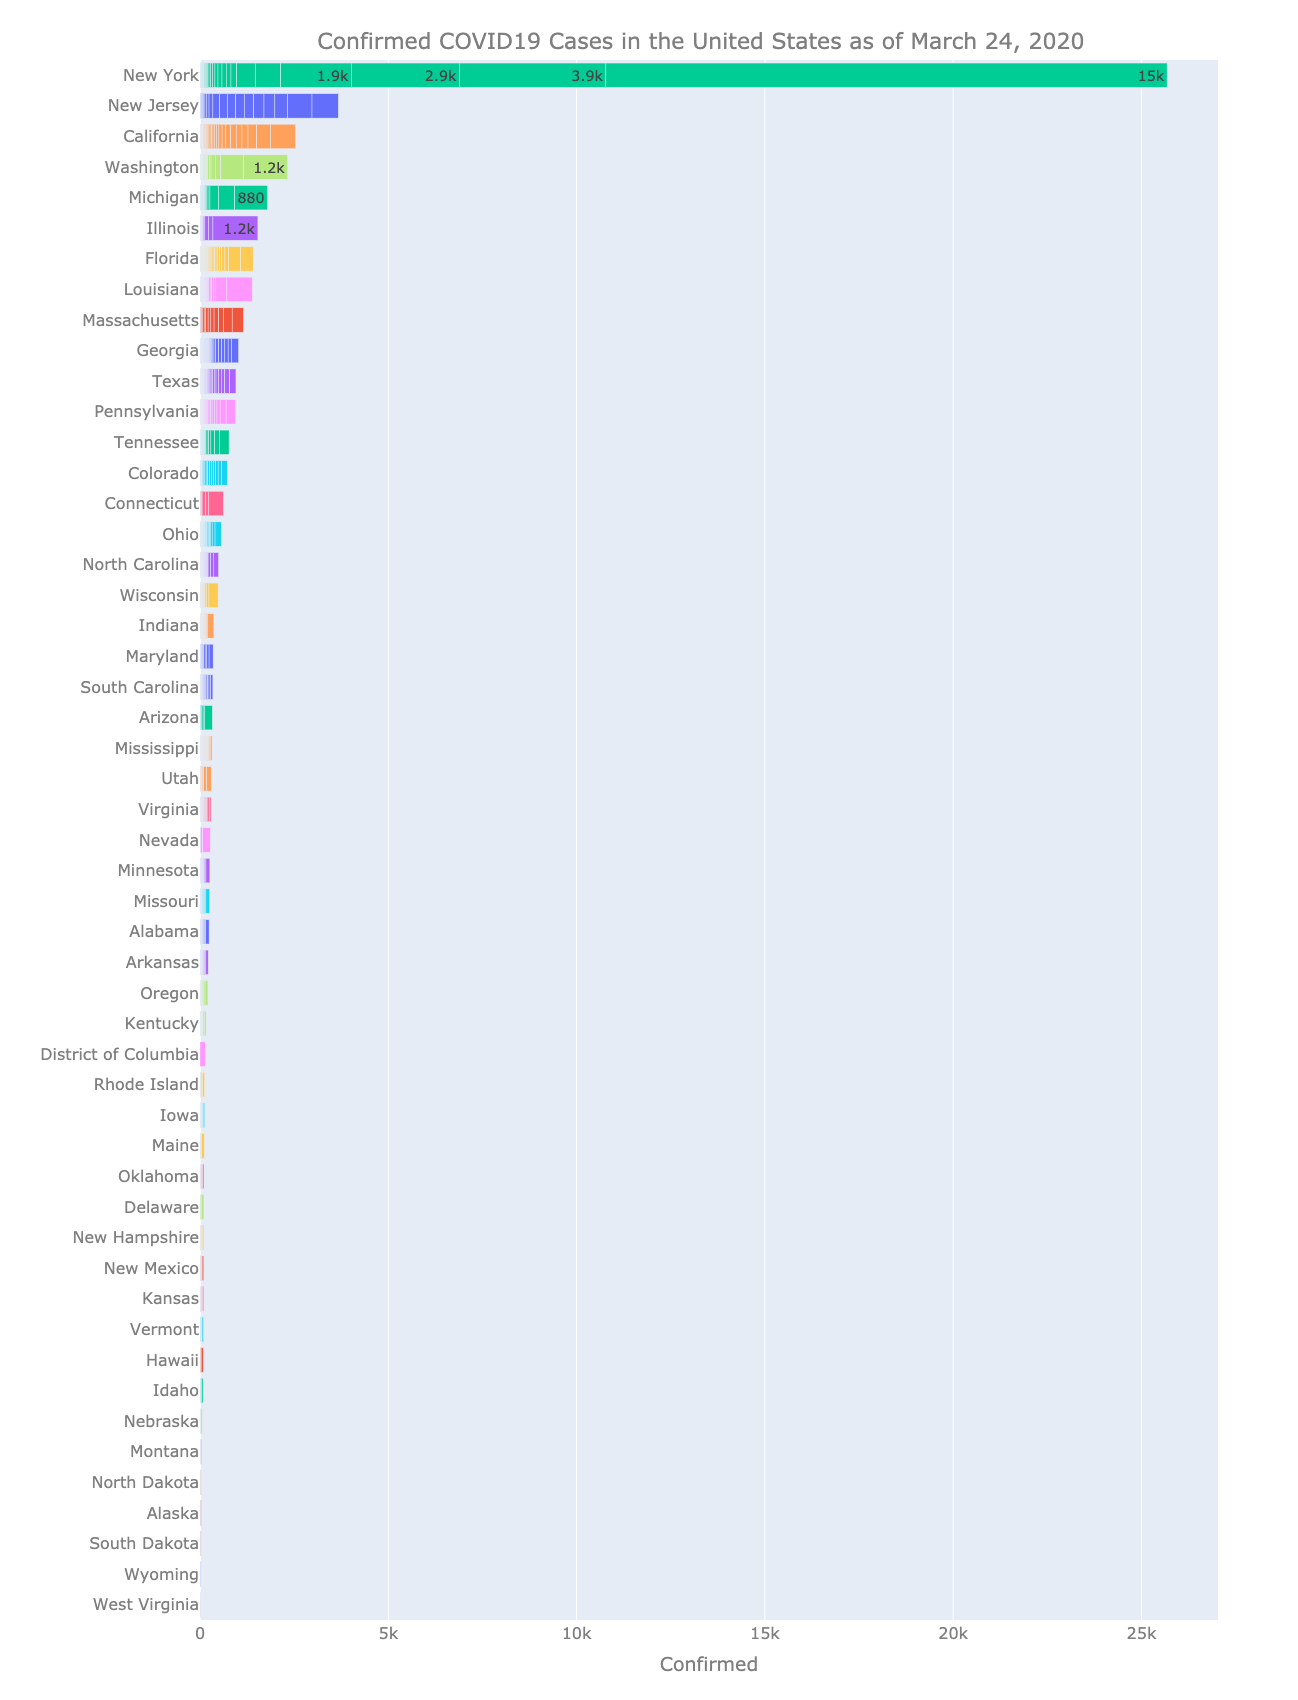

In [8]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

#Confirmed = df1['Confirmed'],
#Deaths = df1['Deaths'],
#Total_Confirmed = df1['Confirmed'].sum(),

fig = px.bar(df1, 
             x="Confirmed", 
             y="State",
             text="Confirmed", #this adds the numbers inside the bars when possible or outside to the right
             color='State', 
             orientation='h',
             hover_name="County", hover_data=["Confirmed", "Deaths"],
             height=1700,
             color_continuous_scale='Magenta',
            )
             
fig.update_layout(
    title={
        'text': "Confirmed COVID19 Cases in the United States as of March 24, 2020",
        'y':0.98,
        'x':0.54,
        'xanchor': 'center',
        'yanchor': 'top'},
    showlegend=False,
    xaxis={'categoryorder':'category ascending'},
    yaxis_title="",
    yaxis=dict(autorange="reversed"),
    yaxis_categoryorder = 'total descending',
    
    font=dict(
        #family="Times New Roman",
        size=16,
        color="#7f7f7f"),
    
    uniformtext_minsize=12, uniformtext_mode='hide',
)

fig.update_xaxes(showline=True, linewidth=0.2)
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
    
fig.show()

import plotly.io as pio
pio.write_html(fig, file='barhMarch24_2020.html', auto_open=True)

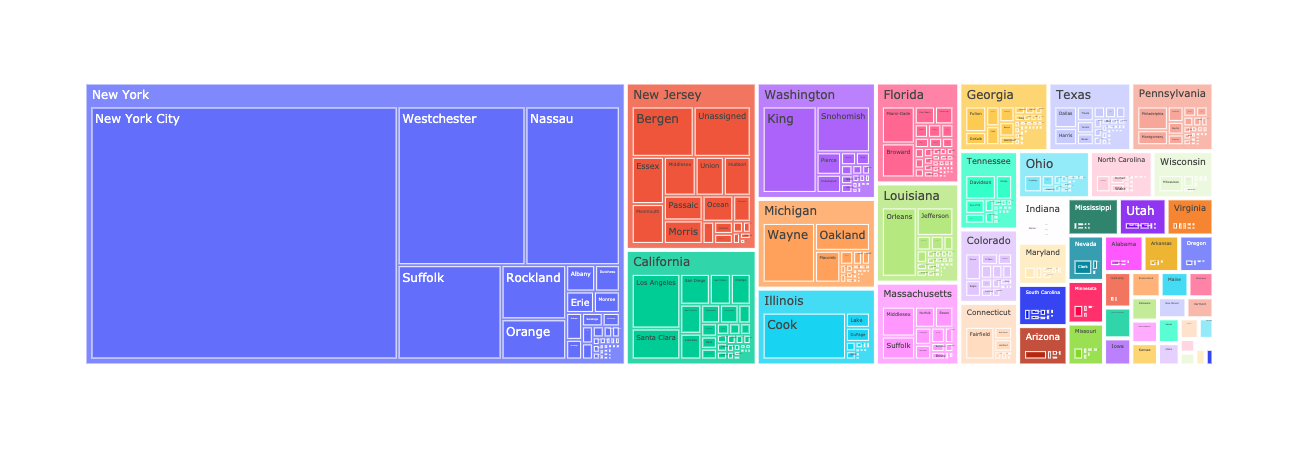

In [7]:
import plotly.express as px
fig = px.treemap(df1, path=['State', 'County'], values='Confirmed')
fig.show()